<a href="https://colab.research.google.com/github/hyeong8465/KTB/blob/main/ktb_ai/ktb_day0710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
데이터 시각화 1

시각화 툴: excel, tableau, Power BI, python(matplotlib, seaborn)
- tableau
    인터랙티브 시각화 기능 제공, 실시간 대시보드, 보고서 작성
    비용이 비쌈, 학습 필요
복잡한 데이터 시각화 및 실시간 데이터 모니터링, 대화형 시각화 및 사용자 정의 대시보드 작성 필요 시 사용

- Power BI
    KPI 모니터링 및 보고서 작성, 실시간 데이터 시각화
    고급 시각화 기능이 제한적, 대규모 처리 성능 저하
ms환경과의 통합 및 실시간 비즈니스 분석, 쉬운 데이터 시각화와 빠른 배포 필요 시 사용

- Python(matplotlib, seaborn)
    matplotlit은 기본적인 시각화 도구, seaborn은 통계적 시각화 강화
    코딩 및 학습 필요
복잡한 시각화와 데이터 분석을 통합, 커스터마이징이 필요한 고급 시각화 필요 시 사용
기업에서 잘 사용하지 않음

'''

#실습

In [ ]:
# 기본 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
! kaggle datasets download -d nikhil7280/weather-type-classification
! unzip weather-type-classification.zip
df = pd.read_csv('weather_classification_data.csv')

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other
  0% 0.00/186k [00:00<?, ?B/s]
100% 186k/186k [00:00<00:00, 21.6MB/s]


In [ ]:
display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


None

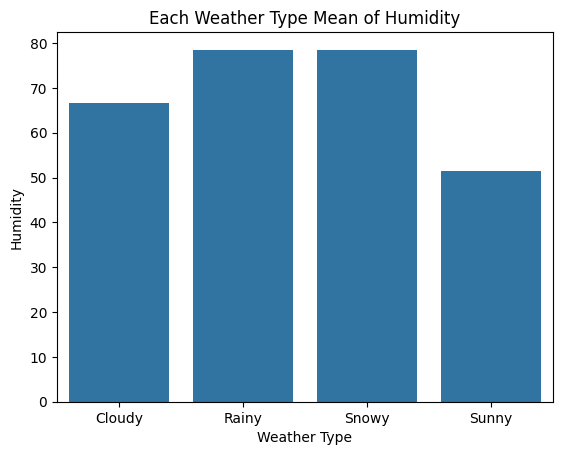

In [ ]:
# 1. 막대그래프
# Weather Type별 평균 Humidity
Weather_hum_mean = df.groupby('Weather Type')['Humidity'].mean()
Weather_Type = Weather_hum_mean.index

sns.barplot(x = Weather_Type, y = Weather_hum_mean)
plt.title('Each Weather Type Mean of Humidity')
plt.xlabel('Weather Type')
plt.ylabel('Humidity')
plt.show()

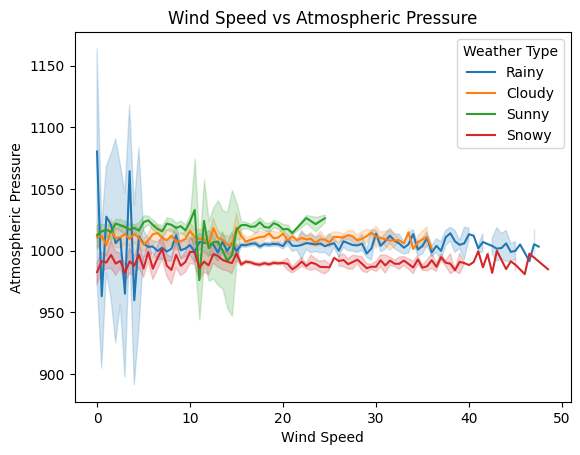

In [ ]:
# 2. 선그래프
# 선 그래프로 추세를 확인할 기준(x)이 딱히 없음
sns.lineplot(x = 'Wind Speed', y = 'Atmospheric Pressure', data = df, hue = 'Weather Type')
plt.title('Wind Speed vs Atmospheric Pressure')
plt.xlabel('Wind Speed')
plt.ylabel('Atmospheric Pressure')
plt.show()

# 대기압은 일정 범위에서 변동한다. 날씨 타입에 따라 최대 풍속이 다르다.
# 오히려 대기압과 날씨 타입이 상관있는 듯

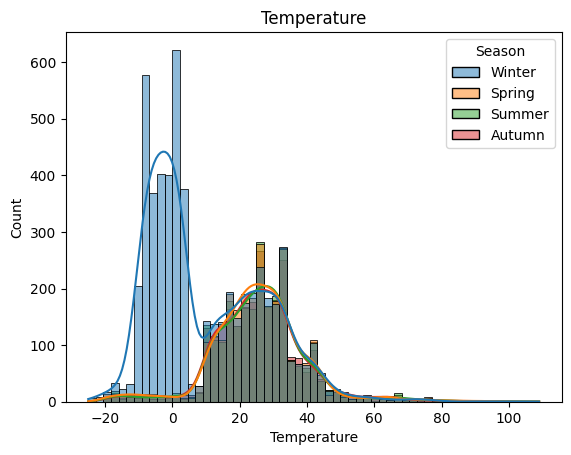

In [ ]:
# 3. 히스토그램
sns.histplot(data = df, x = 'Temperature', hue = 'Season', kde = True)
plt.title('Temperature')
plt.xlabel('Temperature')
plt.show()
# 겨울 때문에 봉이 2개로 나뉨, 겨울의 분포 자체가 봉이 2개네

In [ ]:
pie_CloudCover = df['Cloud Cover'].value_counts()/len(df)
pie_CloudCover

Cloud Cover
overcast         0.461364
partly cloudy    0.345455
clear            0.162045
cloudy           0.031136
Name: count, dtype: float64

In [ ]:
pie_CloudCover.index

Index(['overcast', 'partly cloudy', 'clear', 'cloudy'], dtype='object', name='Cloud Cover')

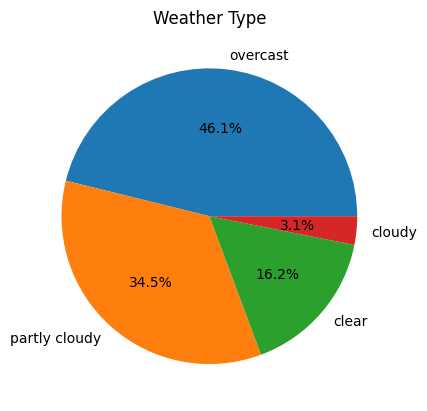

In [ ]:
# 4. 파이차트
plt.pie(labels = pie_CloudCover.index, x = df['Cloud Cover'].value_counts(), autopct = '%1.1f%%')
plt.title('Weather Type')
plt.show()
# 우중충한 날이 많으니 영국인가? 그냥 mimic이네

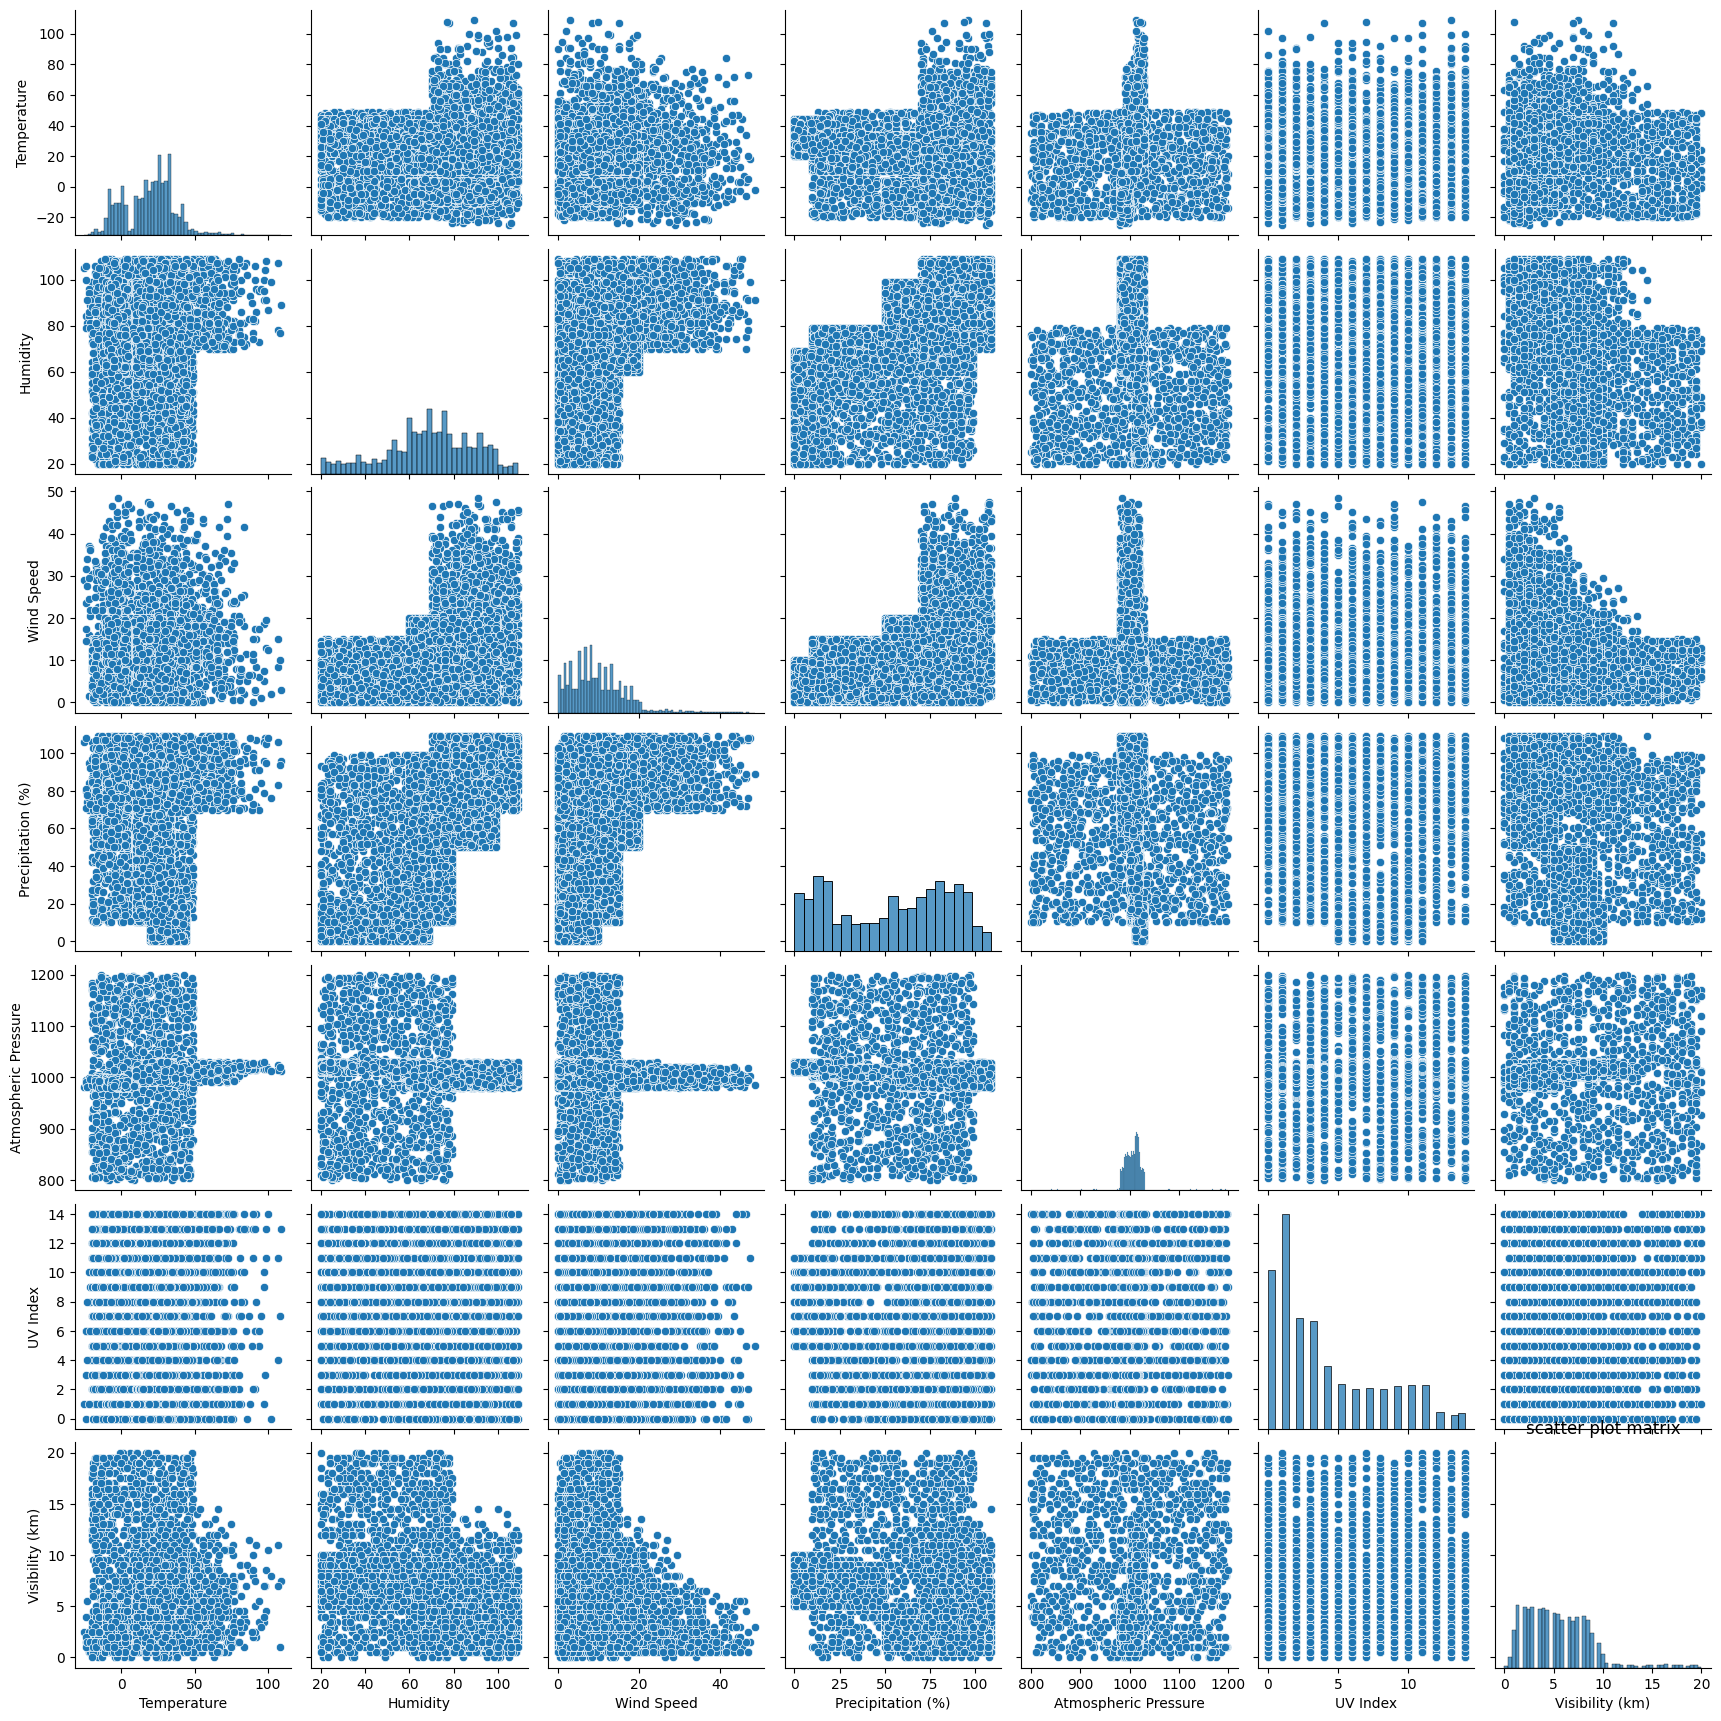

In [ ]:
# 5. 산점도
sns.pairplot(df.select_dtypes(['float64', 'int64']), diag_kind = 'hist')
plt.title('scatter plot matrix')
plt.show()
# 만들어진 데이터라서 scatter plot이 좀 인위적인 모습

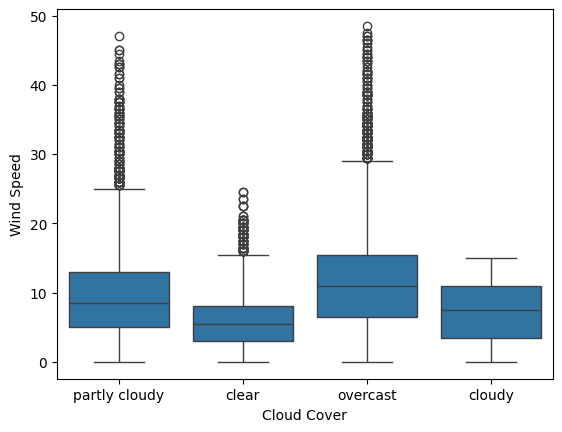

In [ ]:
# 6. 박스플롯
sns.boxplot(x = 'Cloud Cover',y = 'Wind Speed', data = df)
plt.show()

In [ ]:
# 7. 여러 시각화 차트 합쳐보기